In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


## Splitting & Using GB


In [5]:
import time
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_classifier = LGBMClassifier(n_estimators=100, random_state=42)
lgb_classifier.fit(X_train, y_train)

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(lgb_classifier, X_train, y_train, cv=kf)

print(f"Cross-Validation Results: {cross_val_results}")
print(f"Mean Accuracy: {cross_val_results.mean():.2f}")

start_time = time.time()
lgb_classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

print(f"Training time: {training_time} seconds")

y_pred = lgb_classifier.predict(X_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start training from score -0.251483
[LightGBM] [Info] Start training from score -1.995966
[LightGBM] [Info] Start training from score -2.447951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total B

## Using Evaluation Metrics

Accuracy =  95.77464788732394 %
Precision =  0.9509005076470398
Recall =  0.9189221549135342
F1-score =  0.9343167979561423


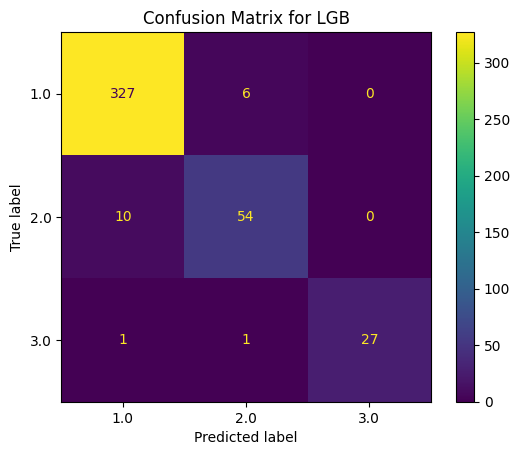

Classification Report
              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       333
         2.0       0.89      0.84      0.86        64
         3.0       1.00      0.93      0.96        29

    accuracy                           0.96       426
   macro avg       0.95      0.92      0.93       426
weighted avg       0.96      0.96      0.96       426



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for LGB')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


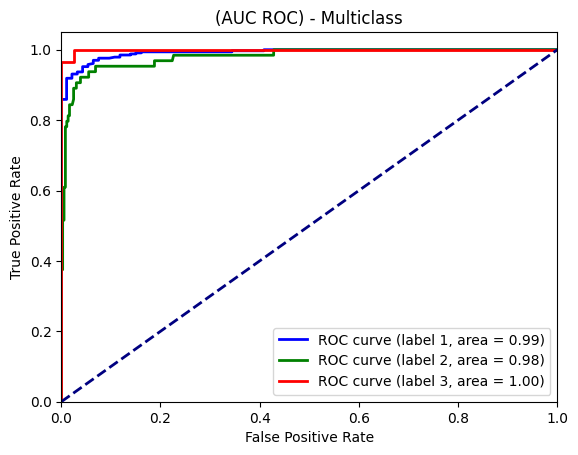

In [7]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
y_scores = lgb_classifier.predict_proba(X_test)

plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 170, number of used features: 19
[LightGBM] [Info] Start training from score -1.498212
[LightGBM] [Info] Start training from score -0.356675
[LightGBM] [Info] Start training from score -2.570849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

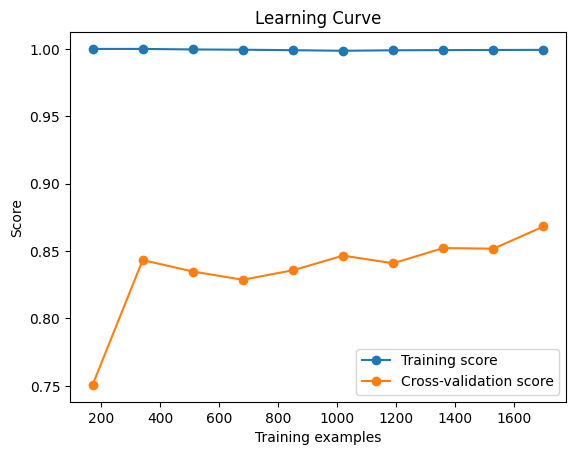

In [8]:
train_sizes, train_scores, test_scores = learning_curve(lgb_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start training from score 1.308824
Feature importance:
abnormal_short_term_variability: 355
percentage_of_time_with_abnormal_long_term_variability: 292
histogram_width: 230
baseline value: 217
histogram_mean: 206
histogram_variance: 172
mean_value_of_short_term_variability: 171
histogram_min: 166
histogram_max: 157
mean_value_of_long_term_variability: 143
histogram_mode: 140
histogram_median: 129
accelerations: 118
uterine_contractions: 111
prolongued_decelerations: 103
fetal_movement: 103
histogram_number_of_peaks: 102
light_decelerations: 56
histogram_tendency: 24
histogram_number_of_zeroes: 5
severe_dece

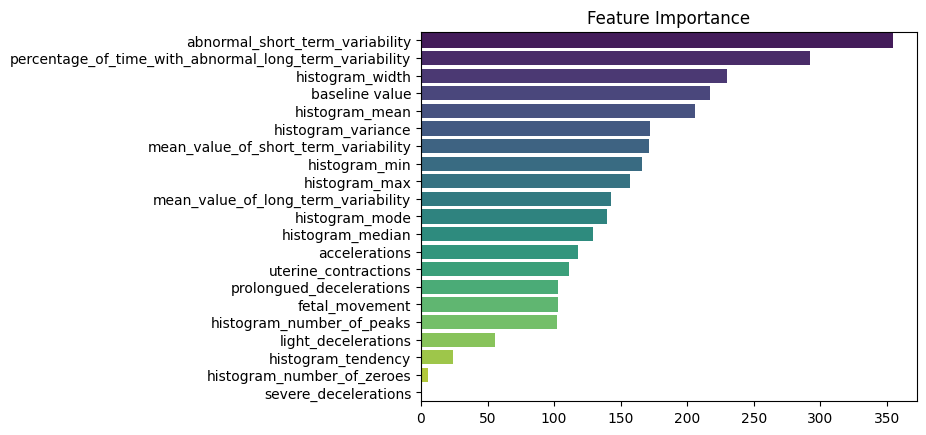

In [9]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("fetal_health.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = lgb.Dataset(X_train, label=y_train)

params = {
    "objective": "regression",
    "metric": "mse",
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9
}

num_round = 100
bst = lgb.train(params, train_data, num_round)

feature_importance = bst.feature_importance(importance_type='split')
feature_names = X.columns
feature_indices = dict(zip(range(len(feature_names)), feature_names))
sorted_idx = np.argsort(feature_importance)[::-1]

print("Feature importance:")
for idx in sorted_idx:
    print(f"{feature_indices[idx]}: {feature_importance[idx]}")

sns.barplot(x=feature_importance[sorted_idx], y=[feature_indices[idx] for idx in sorted_idx], palette="viridis")
plt.title("Feature Importance")
plt.show()


In [10]:
top_k_features_indices = sorted_idx[:16]
print("Indices of Important Features:", top_k_features_indices)

X_selected = X.iloc[:, top_k_features_indices]

Indices of Important Features: [ 7  9 11  0 17 19  8 12 13 10 16 18  1  3  6  2]


## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


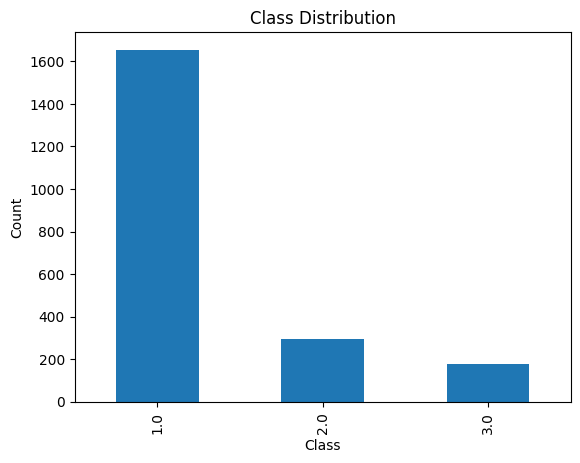

In [11]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)


print("Feature names during training:", X_resampled.columns)
print("Feature names in the test set:", X_test.columns)
X_test_aligned = X_test[X_resampled.columns]

Feature names during training: Index(['abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_width', 'baseline value', 'histogram_mean',
       'histogram_variance', 'mean_value_of_short_term_variability',
       'histogram_min', 'histogram_max', 'mean_value_of_long_term_variability',
       'histogram_mode', 'histogram_median', 'accelerations',
       'uterine_contractions', 'prolongued_decelerations', 'fetal_movement'],
      dtype='object')
Feature names in the test set: Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
   

Class Distribution:
fetal_health
2.0    1655
1.0    1655
3.0    1655
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


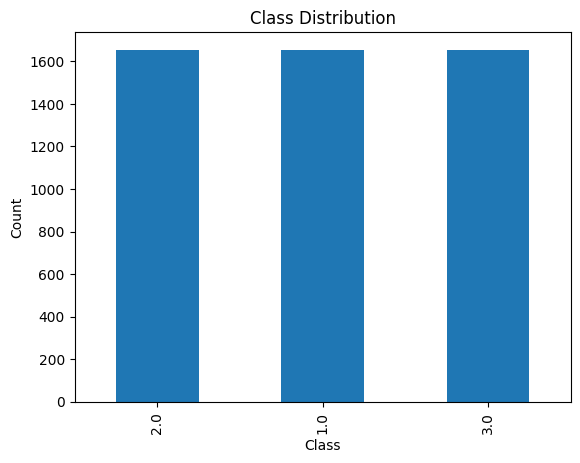

In [13]:


class_distribution = y_resampled.value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using GB

In [14]:


from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold


lgb_classifier_after = lgb.LGBMClassifier()

lgb_classifier_after.fit(X_resampled, y_resampled)

# cv = LeaveOneOut()
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# k_folds = 5 
# kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# y_pred_after = cross_val_predict(lgb_classifier_after, X_resampled, y_resampled, cv=kf)
y_pred_full = lgb_classifier_after.predict(X_resampled)
y_pred_test = lgb_classifier_after.predict(X_test_aligned)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4076
[LightGBM] [Info] Number of data points in the train set: 4965, number of used features: 16
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1166
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 16
[LightGBM] [Info] Start training from score -0.251483
[LightGBM] [Info] Start training from score -1.995966
[LightGBM] [Info] Start training from score -2.447951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in th

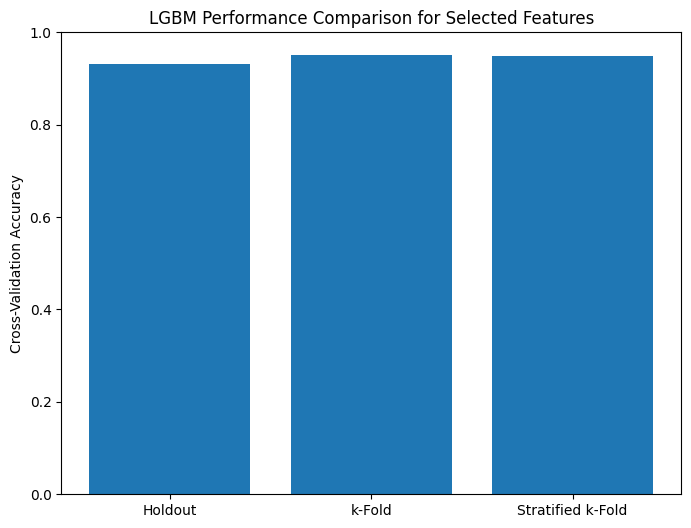

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from lightgbm import LGBMClassifier

cv_scores_holdout = []
cv_scores_kfold = []
cv_scores_stratified_kfold = []

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
lgbm_classifier = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_classifier.fit(X_train, y_train)

scores_holdout = cross_val_score(lgbm_classifier, X_train, y_train, cv=2, scoring='accuracy')
cv_scores_holdout.append(scores_holdout.mean())
print(f'Holdout CV : {scores_holdout.mean()}')

kf = KFold(n_splits=4, shuffle=True, random_state=42)
scores_kfold = cross_val_score(lgbm_classifier, X_selected, y, cv=kf, scoring='accuracy')
cv_scores_kfold.append(scores_kfold.mean())
print(f'k-Fold CV : {scores_kfold.mean()}')

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
scores_stratified_kfold = cross_val_score(lgbm_classifier, X_selected, y, cv=skf, scoring='accuracy')
cv_scores_stratified_kfold.append(scores_stratified_kfold.mean())
print(f'Stratified k-Fold CV: {scores_stratified_kfold.mean()}')

plt.figure(figsize=(8, 6))
plt.bar(['Holdout', 'k-Fold', 'Stratified k-Fold'],
        [cv_scores_holdout[0], cv_scores_kfold[0], cv_scores_stratified_kfold[0]])
plt.title(f'LGBM Performance Comparison for Selected Features')
plt.ylabel('Cross-Validation Accuracy')
plt.ylim([0, 1])
plt.show()


## Using Evaluation Metrics

Accuracy (Resampled): 99.95971802618328 %
Precision (macro, Resampled): 0.999597180261833
Recall (macro, Resampled): 0.999597180261833
F1-score (macro, Resampled): 0.999597180261833
Confusion Matrix (Resampled):


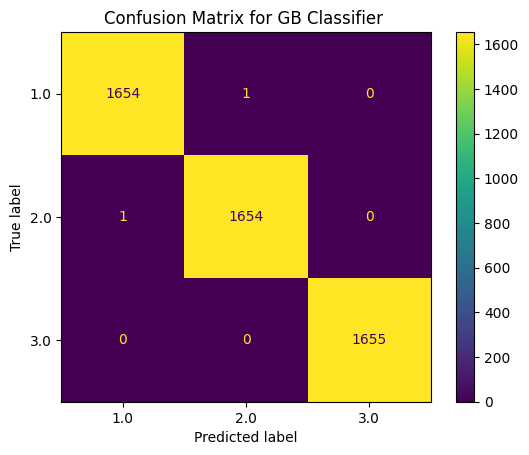

Classification Report (Resampled):
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1655
         2.0       1.00      1.00      1.00      1655
         3.0       1.00      1.00      1.00      1655

    accuracy                           1.00      4965
   macro avg       1.00      1.00      1.00      4965
weighted avg       1.00      1.00      1.00      4965

Test Accuracy: 99.53051643192488 %
Test Precision (macro): 0.9937906656656658
Test Recall (macro): 0.9937906656656658
Test F1-score (macro): 0.9937906656656658


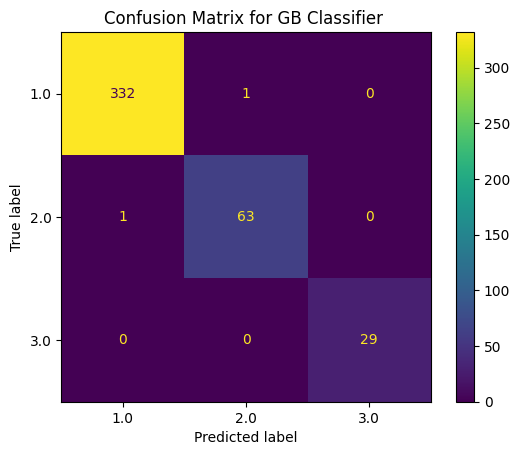

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

accuracy_resampled = accuracy_score(y_resampled, y_pred_full)
precision_resampled = precision_score(y_resampled, y_pred_full, average='macro')
recall_resampled = recall_score(y_resampled, y_pred_full, average='macro')
f1_resampled = f1_score(y_resampled, y_pred_full, average='macro')

conf_matrix_resampled = confusion_matrix(y_resampled, y_pred_full)
class_report_resampled = classification_report(y_resampled, y_pred_full)

print("Accuracy (Resampled):", accuracy_resampled * 100, "%")
print("Precision (macro, Resampled):", precision_resampled)
print("Recall (macro, Resampled):", recall_resampled)
print("F1-score (macro, Resampled):", f1_resampled)

print("Confusion Matrix (Resampled):")
conf_matrix = confusion_matrix(y_resampled, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for GB Classifier ')
plt.show()
print("Classification Report (Resampled):")
print(class_report_resampled)


test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='macro')
test_recall = recall_score(y_test, y_pred_test, average='macro')
test_f1 = f1_score(y_test, y_pred_test, average='macro')
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy * 100, "%")
print("Test Precision (macro):", test_precision)
print("Test Recall (macro):", test_recall)
print("Test F1-score (macro):", test_f1)

conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for GB Classifier ')
plt.show()

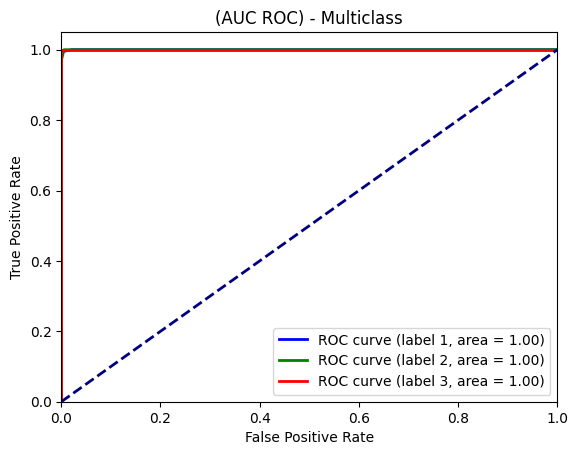

In [17]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
y_scores = lgb_classifier_after.predict_proba(X_test)


plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 170, number of used features: 19
[LightGBM] [Info] Start training from score -1.498212
[LightGBM] [Info] Start training from score -0.356675
[LightGBM] [Info] Start training from score -2.570849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

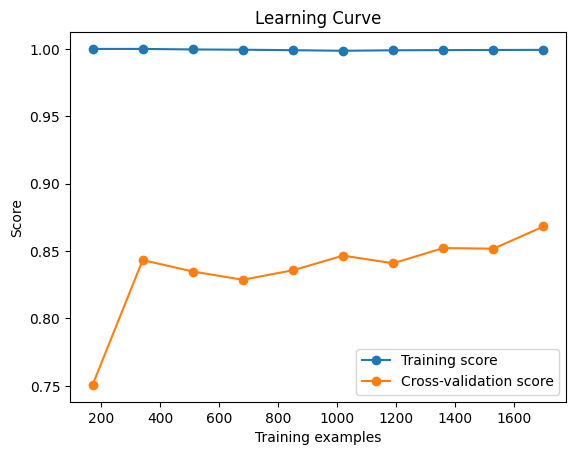

In [18]:
train_sizes, train_scores, test_scores = learning_curve(lgb_classifier_after, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 1700, number of used features: 20
[LightGBM] [Info] Start training from score 1.308824
Feature importance:
abnormal_short_term_variability: 355
percentage_of_time_with_abnormal_long_term_variability: 292
histogram_width: 230
baseline value: 217
histogram_mean: 206
histogram_variance: 172
mean_value_of_short_term_variability: 171
histogram_min: 166
histogram_max: 157
mean_value_of_long_term_variability: 143
histogram_mode: 140
histogram_median: 129
accelerations: 118
uterine_contractions: 111
prolongued_decelerations: 103
fetal_movement: 103
histogram_number_of_peaks: 102
light_decelerations: 56
histogram_tendency: 24
histogram_number_of_zeroes: 5
severe_dece

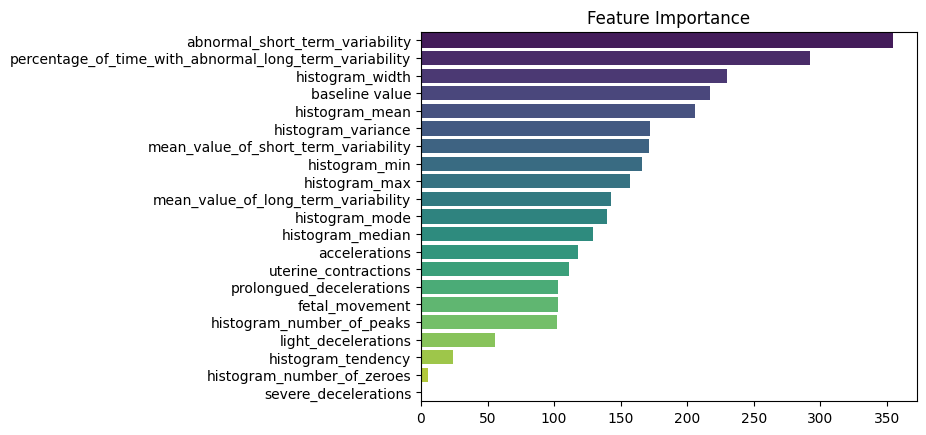

In [19]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("fetal_health.csv")

# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set up the parameters for the LightGBM model
params = {
    "objective": "regression",  # or "classification" based on your task
    "metric": "mse",  # or other appropriate metric
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9
}

# Train the LightGBM model
num_round = 100
bst = lgb.train(params, train_data, num_round)

# Calculate feature importance
feature_importance = bst.feature_importance(importance_type='split')  # or 'gain' for gain-based importance

# Map feature names to their indices
feature_names = X.columns
feature_indices = dict(zip(range(len(feature_names)), feature_names))

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Print feature importance
print("Feature importance:")
for idx in sorted_idx:
    print(f"{feature_indices[idx]}: {feature_importance[idx]}")

# Plot feature importance
sns.barplot(x=feature_importance[sorted_idx], y=[feature_indices[idx] for idx in sorted_idx], palette="viridis")
plt.title("Feature Importance")
plt.show()
